# Data Cleaning and Wrangling with Pandas

In this notebook, we are going to practice our data cleaning skills with the jobs data set. 

We will learn how to:
- reshape the data by adding and removing columns
- handle missing values by dropping rows and columns
- handle missing values by imputing values
- convert data types
- split data

We will use the same `jobs` data set as before from [Pavan Tinniru on Kaggle](https://www.kaggle.com/pavantanniru/-datacleaningforbeginnerusingpandas), we just need to read it in again.

In [2]:
import pandas as pd
jobs = pd.read_csv('Data-cleaning-for-beginners-using-pandas.csv')


Let's just take a look at the data again. There aren't many rows, so `print()` will just show us all the data.

In [2]:
print(jobs)

    Index   Age      Salary  Rating       Location  Established Easy Apply
0       0  44.0   $44k-$99k     5.4       India,In         1999       TRUE
1       1  66.0   $55k-$66k     3.5    New York,Ny         2002       TRUE
2       2   NaN   $77k-$89k    -1.0    New York,Ny           -1         -1
3       3  64.0   $44k-$99k     4.4       India In         1988         -1
4       4  25.0   $44k-$99k     6.4  Australia Aus         2002         -1
5       5  44.0   $77k-$89k     1.4       India,In         1999       TRUE
6       6  21.0   $44k-$99k     0.0    New York,Ny           -1         -1
7       7  44.0   $44k-$99k    -1.0  Australia Aus           -1         -1
8       8  35.0   $44k-$99k     5.4    New York,Ny           -1         -1
9       9  22.0   $44k-$99k     7.7       India,In           -1       TRUE
10     10  55.0   $10k-$49k     5.4       India,In         2008       TRUE
11     11  44.0   $10k-$49k     6.7       India,In         2009         -1
12     12   NaN   $44k-$9

We can also check the data types using dtypes.


In [51]:
jobs.dtypes

Age              int64
Salary          object
Rating         float64
Location        object
Established    float64
Easy Apply        bool
Min Salary       int32
Max Salary       int32
Est Salary     float64
dtype: object

### Dropping Columns

The first thing we want to do is to remove the redundant column `Index` from the DataFrame, because pandas automatically provided an index for the rows. We will save the result in a new DataFrame object.

In [3]:
# using drop to drop a column
jobs_2 = jobs.drop(columns = 'Index')
jobs_2.head()

,Age,Salary,Rating,Location,Established,Easy Apply
0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,64.0,$44k-$99k,4.4,India In,1988,-1
4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


The original DataFrame `jobs` is not modified by the above command.

We can also use the parameter `inplace=True` which will modify the existing DataFrame `jobs`, because the changes will be made "in-place" which means the same DataFrame.

In [4]:
# modify the DataFrame in-place
jobs.drop(columns = 'Index', inplace = True)
jobs.head()

,Age,Salary,Rating,Location,Established,Easy Apply
0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,64.0,$44k-$99k,4.4,India In,1988,-1
4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


### Missing Values

The original data set also contained some missing values. One way to check the number of missing values is to combine two methods `isnull()` and `sum()`.

- `isnull()` returns `True` if a value is null, and `False` otherwise.
- `sum()` adds up the `True` values. `True` evaluates to 1 and `False` evaluates to 0

In [5]:
jobs.isnull().sum()

Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

We can see that this gives us 7 null values for the `Age` column, and 1 null value for the `Rating` column.

We can drop rows or columns that contain missing values using `dropna()`. 

In [6]:
# drop rows that contain any null values
jobs_dropByRow = jobs.dropna()
print(jobs_dropByRow)



     Age      Salary  Rating       Location  Established Easy Apply
0   44.0   $44k-$99k     5.4       India,In         1999       TRUE
1   66.0   $55k-$66k     3.5    New York,Ny         2002       TRUE
3   64.0   $44k-$99k     4.4       India In         1988         -1
4   25.0   $44k-$99k     6.4  Australia Aus         2002         -1
5   44.0   $77k-$89k     1.4       India,In         1999       TRUE
6   21.0   $44k-$99k     0.0    New York,Ny           -1         -1
7   44.0   $44k-$99k    -1.0  Australia Aus           -1         -1
8   35.0   $44k-$99k     5.4    New York,Ny           -1         -1
9   22.0   $44k-$99k     7.7       India,In           -1       TRUE
10  55.0   $10k-$49k     5.4       India,In         2008       TRUE
11  44.0   $10k-$49k     6.7       India,In         2009         -1
13  25.0   $44k-$99k    -1.0  Australia Aus         2019       TRUE
14  66.0   $44k-$99k     4.0  Australia Aus         2020       TRUE
15  44.0  $88k-$101k     3.0  Australia Aus     

In [7]:
# use the argument axis = 1 to drop column that contains any null values
# (default is axis=0 meaning by row)
jobs_dropByCol = jobs.dropna(axis=1)
print(jobs_dropByCol)


        Salary       Location  Established Easy Apply
0    $44k-$99k       India,In         1999       TRUE
1    $55k-$66k    New York,Ny         2002       TRUE
2    $77k-$89k    New York,Ny           -1         -1
3    $44k-$99k       India In         1988         -1
4    $44k-$99k  Australia Aus         2002         -1
5    $77k-$89k       India,In         1999       TRUE
6    $44k-$99k    New York,Ny           -1         -1
7    $44k-$99k  Australia Aus           -1         -1
8    $44k-$99k    New York,Ny           -1         -1
9    $44k-$99k       India,In           -1       TRUE
10   $10k-$49k       India,In         2008       TRUE
11   $10k-$49k       India,In         2009         -1
12   $44k-$99k       India,In         1999         -1
13   $44k-$99k  Australia Aus         2019       TRUE
14   $44k-$99k  Australia Aus         2020       TRUE
15  $88k-$101k  Australia Aus         1999         -1
16   $19k-$40k       India,In         1984         -1
17   $44k-$99k    New York,N

As you can see, this will just remove the missing values completely - but you might also lose data from the other rows and columns!

### Missing Value Imputation

A better strategy would be to **impute** the missing values with new values. Usually this would be an "average" value, or the most probable value for that particular attribute.

For numerical values, it is usually the *mean* or *median*, and for categorical values the category that occurs most frequently.

For example we could impute the mean age from the data set into any missing `Age` values. 

In [8]:
# impute mean into missing values using fillna()
jobs['Age'].fillna(jobs['Age'].mean(), inplace = True)

In [9]:
print(jobs)

          Age      Salary  Rating       Location  Established Easy Apply
0   44.000000   $44k-$99k     5.4       India,In         1999       TRUE
1   66.000000   $55k-$66k     3.5    New York,Ny         2002       TRUE
2   39.045455   $77k-$89k    -1.0    New York,Ny           -1         -1
3   64.000000   $44k-$99k     4.4       India In         1988         -1
4   25.000000   $44k-$99k     6.4  Australia Aus         2002         -1
5   44.000000   $77k-$89k     1.4       India,In         1999       TRUE
6   21.000000   $44k-$99k     0.0    New York,Ny           -1         -1
7   44.000000   $44k-$99k    -1.0  Australia Aus           -1         -1
8   35.000000   $44k-$99k     5.4    New York,Ny           -1         -1
9   22.000000   $44k-$99k     7.7       India,In           -1       TRUE
10  55.000000   $10k-$49k     5.4       India,In         2008       TRUE
11  44.000000   $10k-$49k     6.7       India,In         2009         -1
12  39.045455   $44k-$99k     0.0       India,In   

As you can see, this maintains the total number of rows as 29. However some of the age values now have the mean value `39.045455`. This may not be very meaningful.

### Data Type Conversion

We can convert the data types of a column using the `astype()` method. For example to convert the `Age` column from `float` to `int`.

In [50]:
# replace the values in the 'Age column with the values converted to int'
jobs['Age'] = jobs['Age'].astype('int')

# check the results
jobs.head()

,Age,Salary,Rating,Location,Established,Easy Apply,Min Salary,Max Salary,Est Salary
0,44,$44k-$99k,5.4,India,1999.0,True,44,99,71.5
1,66,$55k-$66k,3.5,New York,2002.0,True,55,66,60.5
2,39,$77k-$89k,NaN,New York,NaN,False,77,89,83.0
3,64,$44k-$99k,4.4,India,1988.0,False,44,99,71.5
4,25,$44k-$99k,6.4,Australia,2002.0,False,44,99,71.5


### Replacing Values

Another useful Pandas method is `replace()` which will replace existing values with new ones to make sure that the data is consistent.

For example, the values in `Location` are not very consistent.

In [11]:
# count the number of each value
jobs['Location'].value_counts()

New York,Ny      12
India,In          9
Australia Aus     7
India In          1
Name: Location, dtype: int64

Some of the locations are recorded with a comma and some without. It also seems redundant to store an acronym of the location, such as 'New York, Ny' and 'India, In'. Let's just use the `replace` method.

Regular expressions are used to match strings.  

The regular expression `'India.*'` means a string that starts with the letters 'India' followed by any character, any number of times. So this would help to match `India,In` and `India In`. 

We are using the argument `regex=True` to indicate that the letters to be replaced are defined using regular expressions.

Computer Hope explains more about [Regular Expressions](https://www.computerhope.com/jargon/r/regex.htm). 



In [12]:
# replace any location starting with the letters 'New York' with just 'New York',
# any location starting with the letters 'India' with 'India'
# any location starting with the letters 'Australia' with 'Australia'.
jobs['Location'].replace('India.*', 'India', regex = True, inplace = True)
jobs['Location'].replace('New York.*', 'New York', regex = True, inplace = True)
jobs['Location'].replace('Australia.*', 'Australia', regex = True, inplace = True)


### Replacing with Lists

We can also notice that the values in `Easy Apply` are either 'TRUE' or '-1'. Let's check by counting the values of each.

In [13]:
jobs['Easy Apply'].value_counts()


TRUE    15
-1      14
Name: Easy Apply, dtype: int64

We can use the `replace` method to replace the value '-1' with the Boolean value `False` and the string value 'TRUE' with the Boolean value `True`. We can pass both the values to be replaced and the new values as lists to the method.

In [14]:
# replace values in the Easy Apply column
# -1 should be replaced with False, 'TRUE' should be replaced with True.
jobs['Easy Apply'].replace(['-1','TRUE'],[False, True], inplace = True)
jobs.head()

,Age,Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,5.4,India,1999,True
1,66,$55k-$66k,3.5,New York,2002,True
2,39,$77k-$89k,-1.0,New York,-1,False
3,64,$44k-$99k,4.4,India,1988,False
4,25,$44k-$99k,6.4,Australia,2002,False


Check the type now to ensure the column stores Boolean values:

In [15]:
jobs.dtypes

Age              int32
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply        bool
dtype: object

### Replacing with Null values

We can also replace a value with `NaN`, which means 'Not a Number', or a null, or missing value. Although we dropped or imputed missing values earlier, sometimes it might be better to keep the value as missing rather than an invalid value.

For example, there are several values in the `Rating` column and `Established` column which are -1. Keeping the value as -1 might cause calculations or plotting to be not meaningful.

We can use the `numpy` library to obtain the `NaN` value as `numpy` is usually used for numerical calculations. 

In [16]:
import numpy as np

jobs['Rating'].replace(-1,np.NaN, inplace = True )
jobs['Established'].replace(-1, np.NaN, inplace = True)
print(jobs)

    Age      Salary  Rating   Location  Established  Easy Apply
0    44   $44k-$99k     5.4      India       1999.0        True
1    66   $55k-$66k     3.5   New York       2002.0        True
2    39   $77k-$89k     NaN   New York          NaN       False
3    64   $44k-$99k     4.4      India       1988.0       False
4    25   $44k-$99k     6.4  Australia       2002.0       False
5    44   $77k-$89k     1.4      India       1999.0        True
6    21   $44k-$99k     0.0   New York          NaN       False
7    44   $44k-$99k     NaN  Australia          NaN       False
8    35   $44k-$99k     5.4   New York          NaN       False
9    22   $44k-$99k     7.7      India          NaN        True
10   55   $10k-$49k     5.4      India       2008.0        True
11   44   $10k-$49k     6.7      India       2009.0       False
12   39   $44k-$99k     0.0      India       1999.0       False
13   25   $44k-$99k     NaN  Australia       2019.0        True
14   66   $44k-$99k     4.0  Australia  

### Splitting Data

Another common data wrangling task would be to split data into more than one column, especially if it has been recorded as a string.

For example, the `Salary` column contains a string with a lower and upper bound for salary values. However, it might be more useful if the salary was a numeric value so that we could calculate the *mean* or *median* salary.

We can use the string `split()` function for this, by specifying *where* we want to split the string.
The `expand=` argument also indicates that we want to expand the values into more than one column.

We can define the two new columns which are the results of the split.

In [17]:
# Split the Salary and add two new columns
jobs[['Min Salary', 'Max Salary']] = jobs['Salary'].str.split('-', n = 1, expand = True)
jobs.head()

,Age,Salary,Rating,Location,Established,Easy Apply,Min Salary,Max Salary
0,44,$44k-$99k,5.4,India,1999.0,True,$44k,$99k
1,66,$55k-$66k,3.5,New York,2002.0,True,$55k,$66k
2,39,$77k-$89k,NaN,New York,NaN,False,$77k,$89k
3,64,$44k-$99k,4.4,India,1988.0,False,$44k,$99k
4,25,$44k-$99k,6.4,Australia,2002.0,False,$44k,$99k


Check the types of the new columns:

In [18]:
jobs.dtypes

Age              int32
Salary          object
Rating         float64
Location        object
Established    float64
Easy Apply        bool
Min Salary      object
Max Salary      object
dtype: object

Since `Min Salary` and `Max Salary` are string objects, let's convert them to integer values. We can use the `astype()` method again, but before that let's strip the 'k' and '$' characters from the right and left sides respectively.

In [19]:
# remove the extra characters from Min Salary and convert to an integer
jobs['Min Salary'] = jobs['Min Salary'].str.rstrip('k')
jobs['Min Salary'] = jobs['Min Salary'].str.lstrip('$')
jobs['Min Salary'] = jobs['Min Salary'].astype(int)

# do the same for Max Salary
jobs['Max Salary'] = jobs['Max Salary'].str.rstrip('k')
jobs['Max Salary'] = jobs['Max Salary'].str.lstrip('$')
jobs['Max Salary'] = jobs['Max Salary'].astype(int)


In [20]:
jobs.head()

,Age,Salary,Rating,Location,Established,Easy Apply,Min Salary,Max Salary
0,44,$44k-$99k,5.4,India,1999.0,True,44,99
1,66,$55k-$66k,3.5,New York,2002.0,True,55,66
2,39,$77k-$89k,NaN,New York,NaN,False,77,89
3,64,$44k-$99k,4.4,India,1988.0,False,44,99
4,25,$44k-$99k,6.4,Australia,2002.0,False,44,99


Now we can calculate the estimated salary to be the midpoint of the `Min Salary` and `Max Salary`.

In [21]:
# Calculate an Estimated Salary for each job, as a new column
jobs['Est Salary'] = (jobs['Max Salary'] + jobs['Min Salary'])/2
jobs.head()

,Age,Salary,Rating,Location,Established,Easy Apply,Min Salary,Max Salary,Est Salary
0,44,$44k-$99k,5.4,India,1999.0,True,44,99,71.5
1,66,$55k-$66k,3.5,New York,2002.0,True,55,66,60.5
2,39,$77k-$89k,NaN,New York,NaN,False,77,89,83.0
3,64,$44k-$99k,4.4,India,1988.0,False,44,99,71.5
4,25,$44k-$99k,6.4,Australia,2002.0,False,44,99,71.5


## Plotting with Pandas

Now that we have cleaned up the data, we can perform some simple plotting with Pandas.

For example, creating a pie chart using `plot.pie`.

In [22]:
# obtain the value counts for each location
jobs1 = jobs['Location'].value_counts()
print(jobs1)
print(jobs1.index)

New York     12
India        10
Australia     7
Name: Location, dtype: int64
Index(['New York', 'India', 'Australia'], dtype='object')


Now that we have each of the locations, we can plot the values and use the index as the labels.

<AxesSubplot:ylabel='Location'>

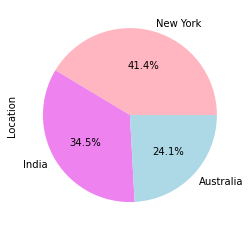

In [23]:

# plot pie chart
jobs1.plot.pie(labels = jobs1.index, autopct = '%.1f%%', 
               colors = ["lightpink", "violet", "lightblue"])


### Bar Charts

A bar chart can be created in Pandas by grouping the categorical data.

For example, if we wanted to find the mean estimated salary by location and whether it is 'Easy Apply'.

In [24]:
# first find the mean salary grouped by 'Location', then 'Easy Apply' values
meanSalary = jobs.groupby(['Location', 'Easy Apply'])['Est Salary'].mean()
meanSalary

Location   Easy Apply
Australia  False         75.250000
           True          71.500000
India      False         54.700000
           True          63.200000
New York   False         73.800000
           True          68.357143
Name: Est Salary, dtype: float64

This gives us the mean salary grouped by Location, then whether it is Easy Apply. 

We can unstack the group so that there the rows are by Location, but 'Easy Apply' values are arranged in columns. This returns a DataFrame object. 

In [25]:
# unstack so that the Easy Apply Values are arranged in columns
meanSalaryByLocation = meanSalary.unstack()
meanSalaryByLocation

Easy Apply,False,True
Location,,
Australia,75.25,71.500000
India,54.70,63.200000
New York,73.80,68.357143


Now we can do a quick bar plot to show the mean salaries which are the values in each row.

<AxesSubplot:xlabel='Location', ylabel='Mean Estimated Salary'>

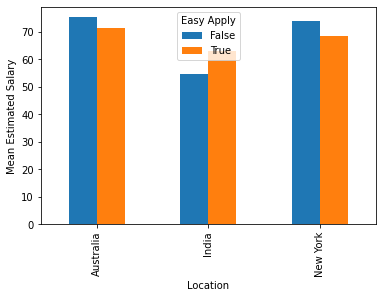

In [26]:
# Plot a bar chart 
meanSalaryByLocation.plot.bar(ylabel='Mean Estimated Salary')


### Stacked Bar Chart

Let's try to create a stacked bar chart to show how many jobs are being counted. We can use the same groupby, but this time we use the `count()` function to count the number of rows.

In [27]:
# count rows by Location and Easy Apply
countLocation = jobs.groupby(['Location', 'Easy Apply'])['Est Salary'].count()
countLocation

Location   Easy Apply
Australia  False         4
           True          3
India      False         5
           True          5
New York   False         5
           True          7
Name: Est Salary, dtype: int64

Similarly, we can unstack:

In [28]:
countByLocation = countLocation.unstack()
countByLocation

Easy Apply,False,True
Location,,
Australia,4,3
India,5,5
New York,5,7


We can stack the values so that it shows the total count of jobs by location.

<AxesSubplot:xlabel='Location', ylabel='Number of Jobs'>

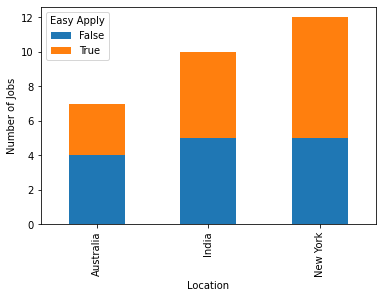

In [29]:
# Create a stacked bar chart
countByLocation.plot.bar(stacked = True, ylabel = 'Number of Jobs')

### Scatter Plot

Now that we have the Estimated Salary as a numeric value, we can also create a quick scatter plot in Pandas:


<AxesSubplot:xlabel='Rating', ylabel='Est Salary'>

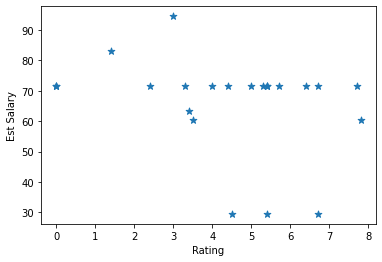

In [30]:
# Create a scatter plot of Estimated Salary vs Rating
jobs.plot.scatter(x = 'Rating', y = 'Est Salary', marker = '*', s = 50)

## Exercises

The Bike Sharing Data Set contains data about rental bikes from capital bikeshare on the 1st of December, 2021. The data is adapted from [Capital Bike Share's System Data](https://www.capitalbikeshare.com/system-data)



In [3]:
# Reading in the data into a dataframe called bikes
bikes = pd.read_csv("bikeshare.csv")
bikes.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B3B1ACDD6158DDFE,classic_bike,01/12/2021 00:03,01/12/2021 00:19,18th & L St NW,31224.0,New Hampshire Ave & T St NW,31229.0,38.903741,-77.042452,38.915544,-77.038252,member
1,68AA4033541B3577,classic_bike,01/12/2021 00:04,01/12/2021 00:21,United Medical Center,31823.0,1st & S Capitol St SE / Oxon Run Trail,31817.0,38.835737,-76.983144,38.824481,-77.005497,casual
2,74C3741F4B63D1AD,electric_bike,01/12/2021 00:07,01/12/2021 00:27,NaN,NaN,NaN,NaN,38.880000,-77.000000,38.900000,-77.020000,member
3,10188DFBC9F175C6,electric_bike,01/12/2021 00:07,01/12/2021 00:22,Eads St & 12th St S,31071.0,Walter Reed Dr & 8th St S,31096.0,38.862763,-77.054372,38.866162,-77.087760,casual
4,851745D256697374,classic_bike,01/12/2021 00:08,01/12/2021 00:17,8th & V St NW,31134.0,12th & L St NW,31251.0,38.917716,-77.022684,38.903819,-77.028400,member


Check the type of the columns

In [4]:
bikes.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Drop the columns 'ride_id', 'start_station_name' and 'end_station_name' and save the result in a variable `newbikes`

In [5]:
newbikes = bikes.drop(columns=['ride_id','start_station_name', 'end_station_name'])
newbikes.head()

,rideable_type,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,classic_bike,01/12/2021 00:03,01/12/2021 00:19,31224.0,31229.0,38.903741,-77.042452,38.915544,-77.038252,member
1,classic_bike,01/12/2021 00:04,01/12/2021 00:21,31823.0,31817.0,38.835737,-76.983144,38.824481,-77.005497,casual
2,electric_bike,01/12/2021 00:07,01/12/2021 00:27,NaN,NaN,38.880000,-77.000000,38.900000,-77.020000,member
3,electric_bike,01/12/2021 00:07,01/12/2021 00:22,31071.0,31096.0,38.862763,-77.054372,38.866162,-77.087760,casual
4,classic_bike,01/12/2021 00:08,01/12/2021 00:17,31134.0,31251.0,38.917716,-77.022684,38.903819,-77.028400,member


Check the number of missing values for each column for the `bikes` data set

In [6]:
bikes.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name    327
start_station_id      327
end_station_name      375
end_station_id        375
start_lat               0
start_lng               0
end_lat                 6
end_lng                 6
member_casual           0
dtype: int64

Since there are over 7000 rows of data, drop all the rows that contain any null values, using the `inplace=` parameter to update the data set.

In [7]:
bikes.dropna(inplace = True)


The starting time of the bike rental is recorded as a string. We can convert it using the pandas method `to_datetime()` as follows:<br>
`bikes['started_at'] = pd.to_datetime(bikes['started_at'])`

Write the statement above and also convert the `ended_at` column to a datetime data type.

Then run `bikes.dtypes` again to check the data types.

In [8]:
bikes['started_at'] = pd.to_datetime(bikes['started_at'])
bikes['ended_at'] = pd.to_datetime(bikes['ended_at'])
bikes.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

Add a column called `duration` that is the difference between the values in the `ended_at` and `started_at` columns, then check the data types again.

In [18]:
# add a column called duration that is the value of 'ended_at' - 'started_at'
bikes['duration'] = bikes['ended_at']- bikes['started_at']
bikes.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id              float64
end_station_name               object
end_station_id                float64
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
duration              timedelta64[ns]
dtype: object

The duration is a `timedelta` object. Use `describe` to view information about `bikes['duration']`

In [19]:
bikes['duration'].describe()

count                         7246
mean     0 days 01:31:05.001380071
std      1 days 06:36:53.659370683
min                0 days 00:00:00
25%                0 days 00:06:00
50%                0 days 00:10:00
75%                0 days 00:16:00
max               30 days 20:47:00
Name: duration, dtype: object

The time delta is given in terms of days, hours, minutes and seconds.
We can convert the timedelta into seconds using the DateTime method `total_seconds()` like this: <br>
`bikes['duration'].dt.total_seconds()`.

Using this method, add a new column called `duration_in_min` that calculates the duration in ***minutes***

In [24]:
# add a new column which is the duration in MINUTES
bikes['duration_in_min'] =bikes['duration'].dt.total_seconds() / 60

Check the value counts of the `rideable_type` column.

In [73]:
bikes['rideable_type'].value_counts()

classic_bike     6117
electric_bike     951
docked_bike       178
Name: rideable_type, dtype: int64

Using the `replace()` method, modify the `bikes` data frame by changing all values of 'classic_bike' to 'classic', 'electric_bike' to 'electric' and 'docked_bike' to 'docked'. 

In [74]:
bikes.replace(['classic_bike', 'electric_bike','docked_bike'],['classic', 'electric','docked'], inplace=True)

In [23]:
bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_in_min
0,B3B1ACDD6158DDFE,classic_bike,2021-01-12 00:03:00,2021-01-12 00:19:00,18th & L St NW,31224.0,New Hampshire Ave & T St NW,31229.0,38.903741,-77.042452,38.915544,-77.038252,member,0 days 00:16:00,16.0
1,68AA4033541B3577,classic_bike,2021-01-12 00:04:00,2021-01-12 00:21:00,United Medical Center,31823.0,1st & S Capitol St SE / Oxon Run Trail,31817.0,38.835737,-76.983144,38.824481,-77.005497,casual,0 days 00:17:00,17.0
3,10188DFBC9F175C6,electric_bike,2021-01-12 00:07:00,2021-01-12 00:22:00,Eads St & 12th St S,31071.0,Walter Reed Dr & 8th St S,31096.0,38.862763,-77.054372,38.866162,-77.087760,casual,0 days 00:15:00,15.0
4,851745D256697374,classic_bike,2021-01-12 00:08:00,2021-01-12 00:17:00,8th & V St NW,31134.0,12th & L St NW,31251.0,38.917716,-77.022684,38.903819,-77.028400,member,0 days 00:09:00,9.0
5,9FF4464D153413AF,electric_bike,2021-01-12 00:09:00,2021-01-12 00:25:00,36th & Calvert St NW / Glover Park,31304.0,1st & O St NW,31519.0,38.922627,-77.070286,38.908743,-77.012411,member,0 days 00:16:00,16.0


Group the bikes by 'rideable_type', then 'member_casual' and **count** the number of 'ride_id' in each group.
Store the results in a variable `bikes_group`

In [29]:
# Count the number of bikes by rideable_type, then member_casual
# store in a variable bikes_group
bikes_group  = bikes.groupby(['rideable_type','member_casual'])['ride_id'].count()
bikes_group

rideable_type  member_casual
classic_bike   casual           1154
               member           4963
docked_bike    casual            178
electric_bike  casual            290
               member            661
Name: ride_id, dtype: int64

**Unstack** the group so that the result is a data frame of `rideable_type` with columns `casual` and `member`.

In [30]:
bikes_group = bikes_group.unstack()
bikes_group

member_casual,casual,member
rideable_type,,
classic_bike,1154.0,4963.0
docked_bike,178.0,NaN
electric_bike,290.0,661.0


Plot the bar chart of the unstacked data frame.

<AxesSubplot:xlabel='rideable_type', ylabel='Number of Bikes'>

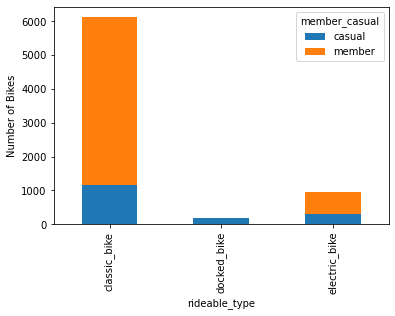

In [32]:
# Create a stacked bar chart
bikes_group.plot.bar(stacked = True, ylabel = 'Number of Bikes')